In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df2 = pd.read_excel('All_Results_filtered.xlsx')

pd.options.display.max_rows = 10000

df_final = df2.drop(['variant', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1)
df_final_mask = df_final['TF'].isin(['TF124', 'TF128', 'TF054', 'TF037', 'TF007', 'TF120', 'TF068', 'TF126', 'TF042', 'TF080', 'TF033'])
df_final = df_final[df_final_mask].drop(['Unnamed: 0'], axis=1)

df_FL = df_final[['TF', 'FC-FL', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 
                          'Unnamed: 41', 'Unnamed: 42']]
df_FL = df_FL.melt(id_vars='TF', value_vars=['FC-FL', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 
                                               'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42'], value_name='FC_FL')
df_FL.drop(['variable'], axis=1, inplace=True)
df_FL.sort_values(by=['TF'], axis=0, inplace=True, ignore_index=True)


df_sFL = df_final[['TF', 'FC-sFL', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 
                          'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50']]
df_sFL = df_sFL.melt(id_vars='TF', value_vars=['FC-sFL', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 
                          'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'], value_name='FC_sFL')
df_sFL.drop(['variable'], axis=1, inplace=True)
df_sFL.sort_values(by=['TF'], axis=0, inplace=True, ignore_index=True)

df_OE = pd.merge(df_FL, df_sFL, on='TF')
df_OE['modification'] = 'over-expression'
tf_to_cassette = {'TF124': 'AZF1', 'TF128': 'DEP1', 'TF054': 'EUF1', 'TF037': 'GZF1', 'TF007': 'HAC1', 'TF120': 'HAP1', 'TF068': 'HSF1',
                  'TF126': 'KLF1', 'TF042': 'MIG1', 'TF080': 'SFL1', 'TF033': 'SKN7'}
df_OE['cassette'] = df_OE['TF'].map(tf_to_cassette)
df_OE = df_OE.rename({'FC_FL': 'rProt_total', 'FC_sFL': 'rProt_normalized'}, axis=1)
print(df_OE)


          TF  rProt_total  rProt_normalized     modification cassette
0      TF007     0.954283          1.012115  over-expression     HAC1
1      TF007     0.954283          0.759007  over-expression     HAC1
2      TF007     0.954283          1.030592  over-expression     HAC1
3      TF007     0.954283          1.021402  over-expression     HAC1
4      TF007     0.954283          0.867441  over-expression     HAC1
...      ...          ...               ...              ...      ...
11259  TF128     0.141548          0.153399  over-expression     DEP1
11260  TF128     0.141548          0.170817  over-expression     DEP1
11261  TF128     0.141548          0.180447  over-expression     DEP1
11262  TF128     0.141548          0.152211  over-expression     DEP1
11263  TF128     0.141548          0.140960  over-expression     DEP1

[11264 rows x 5 columns]


In [4]:
df1 = pd.read_excel('KO_data_filtered.xlsx')

df1 = df1.drop(['Unnamed: 0', 'strain', 'growth', 'rProt', 'normalized_rProt', 'FC_growth'], axis =1)
df1 = df1[df1['cassette'] != 'RedStar+']

cassette_to_TF = {'AZF1': 'TF124', 'DEP1': 'TF128', 'EUF1': 'TF054', 'GZF1': 'TF037', 'HAC1': 'TF007', 'HAP1': 'TF120', 'HSF1': 'TF068',
                  'KLF1': 'TF126', 'MIG1': 'TF042', 'SFL1': 'TF080', 'SKN7': 'TF033'}
df1['TF'] = df1['cassette'].map(cassette_to_TF)
df1['modification'] = 'knock-out'

df_KO = df1.rename({'FC_r-Prot': 'rProt_total', 'FC_normalized_r-Prot': 'rProt_normalized'}, axis=1)

print(df_KO)

    cassette  rProt_total  rProt_normalized     TF modification
0       GZF1     1.955584          1.818075  TF037    knock-out
1       GZF1     2.756708          2.066946  TF037    knock-out
2       HSF1     1.878807          1.834118  TF068    knock-out
3       HSF1     2.648479          2.085185  TF068    knock-out
4       SKN7     1.508249          1.481625  TF033    knock-out
5       SKN7     2.126118          1.684440  TF033    knock-out
6       HAC1     1.218909          1.080671  TF007    knock-out
7       HAC1     1.718247          1.228601  TF007    knock-out
8       KLF1     1.228426          1.233435  TF126    knock-out
9       KLF1     1.731664          1.402277  TF126    knock-out
10      DEP1     2.286802          2.432505  TF128    knock-out
11      DEP1     3.223614          2.765484  TF128    knock-out
12      AZF1     1.096447          1.022824  TF124    knock-out
13      AZF1     1.545617          1.162836  TF124    knock-out
14      AZF1     0.928299          0.845

In [5]:
pd.set_option("display.max_rows", 2000)


df = pd.concat([df_OE, df_KO], ignore_index=True)

order = ['KLF1', 'GZF1', 'HSF1', 'AZF1', 'DEP1', 'SKN7', 'HAC1', 'HAP1', 'EUF1', 'MIG1', 'SFL1']
# Convert the column to Categorical with your custom order
df['cassette'] = pd.Categorical(df['cassette'], categories=order, ordered=True)

# Sort the DataFrame according to the custom order
df.sort_values(by='cassette')


print(df)

          TF  rProt_total  rProt_normalized     modification cassette
0      TF007     0.954283          1.012115  over-expression     HAC1
1      TF007     0.954283          0.759007  over-expression     HAC1
2      TF007     0.954283          1.030592  over-expression     HAC1
3      TF007     0.954283          1.021402  over-expression     HAC1
4      TF007     0.954283          0.867441  over-expression     HAC1
...      ...          ...               ...              ...      ...
11375  TF080     1.586762          1.304755        knock-out     SFL1
11376  TF080     1.336929          1.244566        knock-out     SFL1
11377  TF080     1.884615          1.414931        knock-out     SFL1
11378  TF124     0.911168          0.805872        knock-out     AZF1
11379  TF124     1.284436          0.916186        knock-out     AZF1

[11380 rows x 5 columns]


In [6]:
# Define the conditions
total_OE = ['TF037', 'TF068', 'TF124', 'TF126', 'TF128']
total_KO = ['TF033', 'TF037', 'TF054', 'TF068', 'TF080', 'TF120', 'TF128']

# Create the new column 'stat_signif_total'
df['stat_signif_total'] = np.where(
    (df['modification'] == 'over-expression') & df['TF'].isin(total_OE) | 
    (df['modification'] == 'knock-out') & df['TF'].isin(total_KO),
    True, False
)

normalized_OE = ['TF037', 'TF068', 'TF124', 'TF126', 'TF128']
normalized_KO = ['TF033', 'TF037', 'TF054', 'TF068', 'TF120', 'TF128']

df['stat_signif_normalized'] = np.where(
    (df['modification'] == 'over-expression') & df['TF'].isin(normalized_OE) | 
    (df['modification'] == 'knock-out') & df['TF'].isin(normalized_KO),
    True, False
)

print(df)

          TF  rProt_total  rProt_normalized     modification cassette  \
0      TF007     0.954283          1.012115  over-expression     HAC1   
1      TF007     0.954283          0.759007  over-expression     HAC1   
2      TF007     0.954283          1.030592  over-expression     HAC1   
3      TF007     0.954283          1.021402  over-expression     HAC1   
4      TF007     0.954283          0.867441  over-expression     HAC1   
...      ...          ...               ...              ...      ...   
11375  TF080     1.586762          1.304755        knock-out     SFL1   
11376  TF080     1.336929          1.244566        knock-out     SFL1   
11377  TF080     1.884615          1.414931        knock-out     SFL1   
11378  TF124     0.911168          0.805872        knock-out     AZF1   
11379  TF124     1.284436          0.916186        knock-out     AZF1   

       stat_signif_total  stat_signif_normalized  
0                  False                   False  
1                  Fa

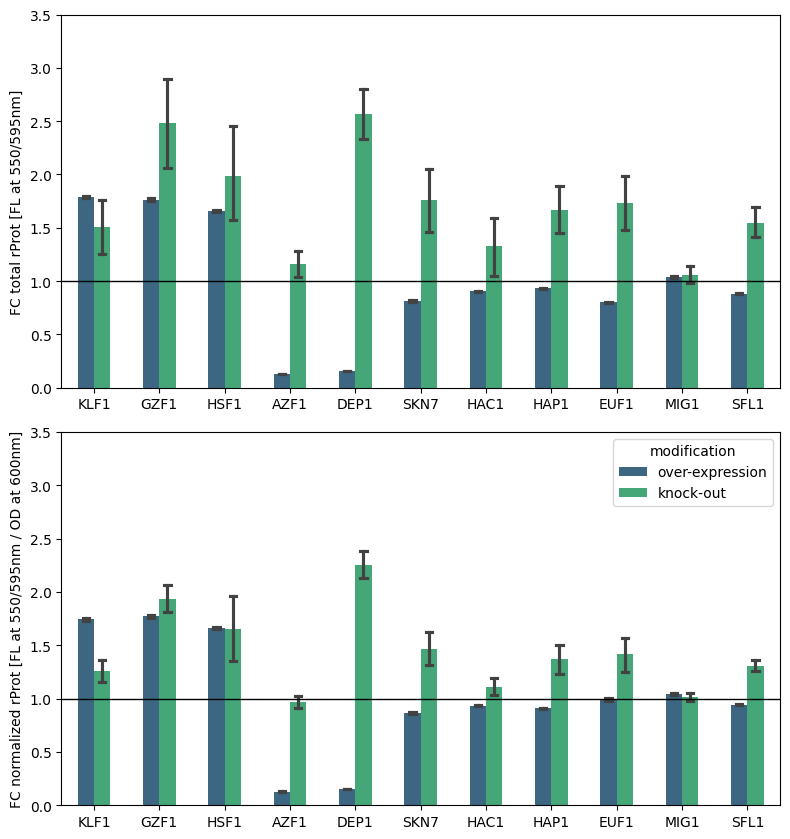

In [9]:

fig, axes = plt.subplots(2, 1, figsize=(8, 8.5))

sns.barplot(df, x = df['cassette'], y = df['rProt_total'], ax=axes[0], capsize = 0.2, hue= 'modification', palette='viridis', width=0.5)
axes[0].axhline(y=1, color = "k", linestyle='-', linewidth = 1)
axes[0].set_ylabel('FC total rProt [FL at 550/595nm]')
axes[0].set_xlabel('')
axes[0].set_ylim(0, 3.5)
axes[0].legend().remove()


sns.barplot(df, x = df['cassette'], y = df['rProt_normalized'], ax=axes[1], capsize = 0.2, hue= 'modification', palette='viridis', width=0.5)
axes[1].axhline(y=1, color = "k", linestyle='-', linewidth = 1)
axes[1].set_ylabel('FC normalized rProt [FL at 550/595nm / OD at 600nm]')
axes[1].set_xlabel('')
axes[1].set_ylim(0, 3.5)



plt.tight_layout()
plt.savefig('barplot_OE_KO_RedStar.png')



KeyError: 'inRedStar'

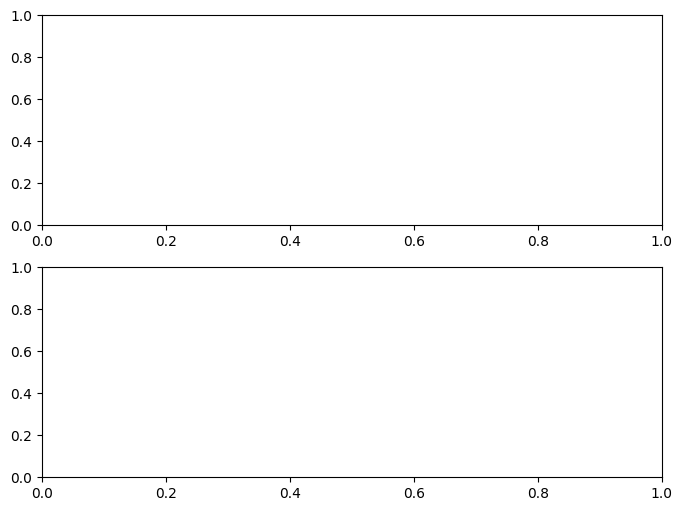

In [8]:
#x = df[(df['modification'] != 'control') & (df['cassette'] != 'RedStar-')]



fig, axes = plt.subplots(2, 1, figsize=(8, 6))

sns.boxplot(df, x = df['cassette'], y = df['inRedStar'], ax=axes[0], hue= 'modification', palette='viridis', width=0.5)
axes[0].axhline(y=1, color = "k", linestyle='-', linewidth = 1)
axes[0].set_xlabel('')
axes[0].legend().remove()

sns.boxplot(df, x = df['cassette'], y = df['normalized_inRedStar'], ax=axes[1], hue= 'modification', palette='viridis', width=0.5)
axes[1].axhline(y=1, color = "k", linestyle='-', linewidth = 1)
axes[1].set_xlabel('')

plt.tight_layout()
#plt.savefig('boxplot_OE_KO_RedStar.png')



In [ ]:
df.groupby(['cassette', 'modification']).agg({'FC_growth': ['mean', 'std'],
                                            'FC_r-Prot': ['mean', 'std'],
                                            'FC_normalized_r-Prot': ['mean', 'std']})


C:\Users\User\AppData\Local\Temp\ipykernel_40440\640694272.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['cassette', 'modification']).agg({'FC_growth': ['mean', 'std'],


FC_growth           FC_r-Prot            \
                             mean       std      mean       std   
cassette modification                                             
RedStar+ control         0.976277  0.067622  0.892914  0.201865   
         knock-out            NaN       NaN       NaN       NaN   
         overexpression       NaN       NaN       NaN       NaN   
RedStar- control              NaN       NaN       NaN       NaN   
         knock-out       1.059418  0.133378  0.221701  0.044261   
         overexpression       NaN       NaN       NaN       NaN   
KLF1     control              NaN       NaN       NaN       NaN   
         knock-out       1.013657  0.148179  1.144486  0.488286   
         overexpression  1.033571  0.070555  1.925841  0.600849   
GZF1     control              NaN       NaN       NaN       NaN   
         knock-out       1.005074  0.097302  1.059140  0.456516   
         overexpression  0.990110  0.076883  1.661367  0.456073   
HSF1     control              NaN       NaN       NaN       NaN   
         knock-out       1.068401  0.080347  1.771418  0.805853   
         overexpression  1.005291  0.075175  1.720222  0.520099   
AZF1     control              NaN       NaN       NaN       NaN   
         knock-out       1.162395  0.145019  1.080028  0.239271   
         overexpression  0.998589  0.158893  0.181472  0.090027   
DEP1     control              NaN       NaN       NaN       NaN   
         knock-out       1.127005  0.136838  2.183372  0.722361   
         overexpression  1.027787  0.084971  0.374516  0.431849   
SKN7     control              NaN       NaN       NaN       NaN   
         knock-out       1.195122  0.161043  1.756025  0.352085   
         overexpression  0.962583  0.084421  0.888515  0.262165   
HAC1     control              NaN       NaN       NaN       NaN   
         knock-out       1.188129  0.170886  1.330588  0.307164   
         overexpression  0.950805  0.087644  0.824829  0.231215   
HAP1     control              NaN       NaN       NaN       NaN   
         knock-out       1.195520  0.136741  1.503362  0.470226   
         overexpression  1.028320  0.074998  0.996713  0.314189   
EUF1     control              NaN       NaN       NaN       NaN   
         knock-out       1.195283  0.140574  1.401685  0.520471   
         overexpression  0.843061  0.160584  0.818867  0.232828   
MIG1     control              NaN       NaN       NaN       NaN   
         knock-out       1.083132  0.147942  1.401048  0.760359   
         overexpression  1.028888  0.068338  1.120953  0.306790   
SFL1     control              NaN       NaN       NaN       NaN   
         knock-out       1.151356  0.144014  1.364671  0.389364   
         overexpression  0.890453  0.154078  0.876009  0.298748   

                        FC_normalized_r-Prot            
                                        mean       std  
cassette modification                                   
RedStar+ control                    0.906708  0.169322  
         knock-out                       NaN       NaN  
         overexpression                  NaN       NaN  
RedStar- control                         NaN       NaN  
         knock-out                  0.208056  0.019722  
         overexpression                  NaN       NaN  
KLF1     control                         NaN       NaN  
         knock-out                  1.088264  0.344664  
         overexpression             1.841040  0.429798  
GZF1     control                         NaN       NaN  
         knock-out                  1.031202  0.301686  
         overexpression             1.659171  0.362536  
HSF1     control                         NaN       NaN  
         knock-out                  1.653823  0.763305  
         overexpression             1.690698  0.387385  
AZF1     control                         NaN       NaN  
         knock-out                  0.920042  0.109191  
         overexpression             0.189482  0.104383  
DEP1     con